In [1]:
import networkx as nx
import pandas as pd
import powerlaw
import matplotlib.pyplot as plt
import time
import seaborn as sns
import itertools

In [2]:
def top(d: dict) -> list:
    for key, value in sorted(d.items(), key=lambda x: x[1], reverse=True)[:5]:
        print(f'{key}: {value}')

In [3]:
# Load the graph using NetworkX
dataset_name = 'TV Shows'
df = pd.read_csv('data/tvshow_edges.csv')
edges = [tuple(x) for x in df.to_numpy()]

# Creating the graph
G_nx = nx.Graph()
G_nx.add_edges_from(edges)

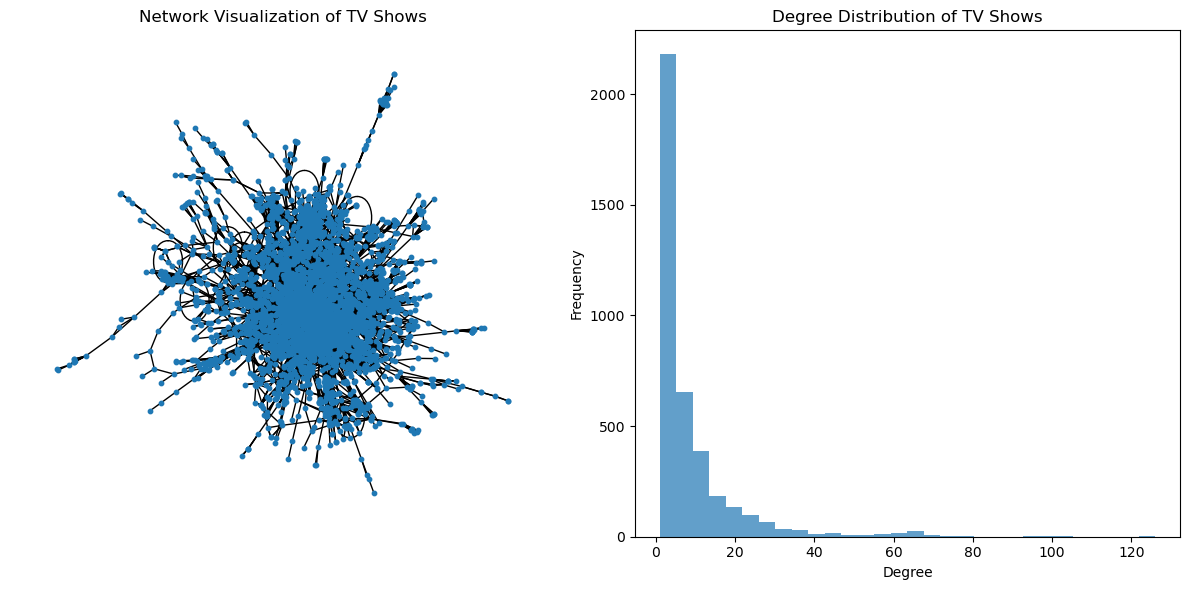

In [4]:
plt.figure(figsize=(12, 6))

# Subplot 1: Network Visualization
plt.subplot(121)
pos = nx.spring_layout(G_nx)
nx.draw(G_nx, node_size=10, pos=pos)
plt.title('Network Visualization of ' + dataset_name)

# Subplot 2: Degree Distribution
plt.subplot(122)
degrees = [d for n, d in G_nx.degree()]
plt.hist(degrees, bins=30, alpha=0.7)
plt.title('Degree Distribution of ' + dataset_name)
plt.xlabel('Degree')
plt.ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the combined plot
plt.show()

In [5]:
# Calculate network properties
degree_distr = sorted(dict(G_nx.degree()).values(), reverse=True)
fit = powerlaw.Fit(degree_distr)

print('Number of nodes:', len(G_nx.nodes()))
print('Number of edges:', len(G_nx.edges()))
print('Min degree:', min(degrees))
print('Max degree:', max(degrees))
print('Average degree:', sum(degrees) / len(degrees))
print('Estimated gamma:', fit.alpha)

Calculating best minimal value for power law fit
Number of nodes: 3892
Number of edges: 17262
Min degree: 1
Max degree: 126
Average degree: 8.870503597122303
Estimated gamma: 2.84140451588068


## Centrality

In [6]:
betweenness_centrality = nx.betweenness_centrality(G_nx)
print('Betweenness Centrality:')
top(betweenness_centrality)

Betweenness Centrality:
3254: 0.10544488181477074
2008: 0.09352541687013526
819: 0.0804900367587108
2170: 0.07471499425323284
2751: 0.07465790776474893


In [7]:
closeness_centrality = nx.closeness_centrality(G_nx)
print('Closeness Centrality:')
top(closeness_centrality)

Closeness Centrality:
3254: 0.2609832986786505
2008: 0.2593827078194787
2895: 0.25618909665525413
819: 0.251860961874555
2751: 0.2477712684666327


In [8]:
degree_centrality = nx.degree_centrality(G_nx)
print('Degree Centrality:')
top(degree_centrality)

Degree Centrality:
2008: 0.03238242097147263
3254: 0.03238242097147263
3525: 0.027756360832690827
1177: 0.026728347468517093
1673: 0.026214340786430226


In [9]:
eigenvector_centrality = nx.eigenvector_centrality(G_nx)
print('Eigenvector Centrality:')
top(eigenvector_centrality)

Eigenvector Centrality:
3525: 0.13852232165166403
1673: 0.13848281763038678
1840: 0.1372642132467576
2659: 0.13690301421138854
3156: 0.136829989854408


In [10]:
page_rank_centrality = nx.pagerank(G_nx)
print('Page Rank Centrality:')
top(page_rank_centrality)

Page Rank Centrality:
2008: 0.0030692969371275743
3254: 0.0030496232920077565
2170: 0.0027400960806775766
2589: 0.0016409770612956448
412: 0.0016208246151203634


In [11]:
hits_centrality = nx.hits(G_nx)[0]
print('HITS Centrality:')
top(hits_centrality)

HITS Centrality:
3525: 0.014830845036979312
1673: 0.014826461662435793
1840: 0.014696162315092465
2659: 0.014657496032855356
3156: 0.014649650143998235


In [12]:
current_flow_betweenness_centrality = nx.current_flow_betweenness_centrality(G_nx)
print('Current Flow Betweenness:')
top(current_flow_betweenness_centrality)

Current Flow Betweenness:
3254: 0.09404480586555553
2008: 0.09039428311969963
2170: 0.07996125372141108
412: 0.06484822442739165
1054: 0.06324554946947007


In [13]:
load_centrality = nx.load_centrality(G_nx)
print('Load Centrality:')
top(load_centrality)

Load Centrality:
3254: 0.09435888954904396
2008: 0.0832506331329158
819: 0.07949729264004937
2170: 0.07691668441129465
2751: 0.07100976823889157


In [14]:
subgraph_centrality = nx.subgraph_centrality(G_nx)
print('Subgraph Centrality:')
top(subgraph_centrality)

Subgraph Centrality:
3525: 1.2204355606215462e+26
1673: 1.2197142483041982e+26
1840: 1.1983700299722168e+26
2659: 1.1920723917104347e+26
3156: 1.190796544285172e+26


In [15]:
harmonic_centrality = nx.harmonic_centrality(G_nx)
print('Harmonic Centrality:')
top(harmonic_centrality)

Harmonic Centrality:
3254: 1234.8294372294595
2008: 1229.433405483428
2895: 1183.0367243867408
819: 1128.0989177489403
2751: 1114.1536796537055


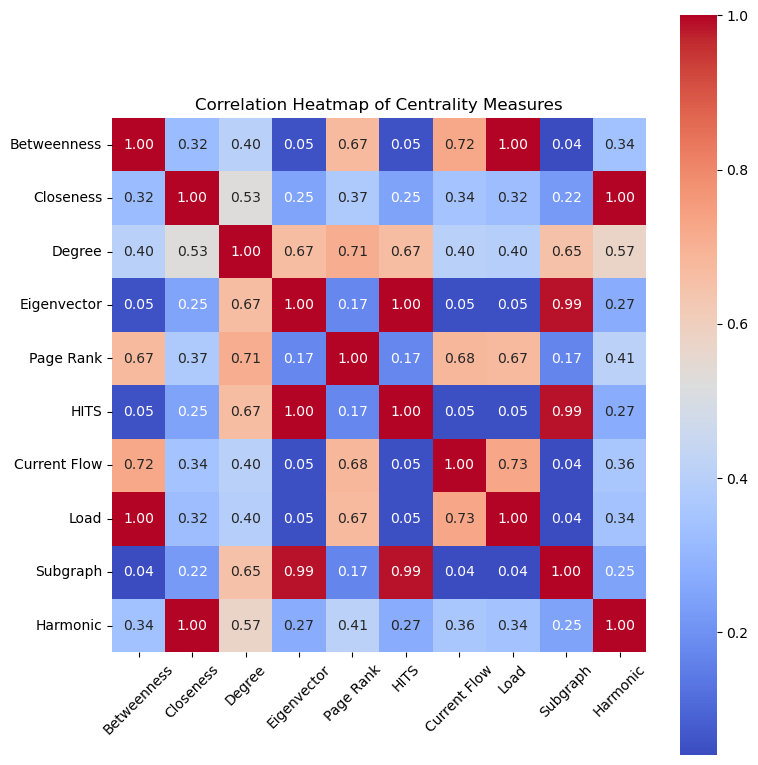

In [16]:
# Convert centrality measures to DataFrames
centrality_measures = {
    'Betweenness': betweenness_centrality,
    'Closeness': closeness_centrality,
    'Degree': degree_centrality,
    'Eigenvector': eigenvector_centrality,
    'Page Rank': page_rank_centrality,
    'HITS': hits_centrality,
    'Current Flow': current_flow_betweenness_centrality,
    'Load': load_centrality,
    'Subgraph': subgraph_centrality,
    'Harmonic': harmonic_centrality
}

# Compute correlations between centrality measures
centrality_df = pd.DataFrame(centrality_measures)
centrality_corr = centrality_df.corr()

# Visualize correlation matrix
plt.figure(figsize=(8, 8))
plt.title('Correlation Heatmap of Centrality Measures')
sns.heatmap(centrality_corr, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Community Detection

In [17]:
communities = {}
modularity_values = {}
coverage_values = {}
performance_values = {}

k = 4
max_size = 4

In [18]:
communities['Bipartitions'] = nx.community.kernighan_lin_bisection(G_nx)
print('No of communities: ', len(communities['Bipartitions']))

modularity_values['Bipartitions'] = nx.community.modularity(G_nx, communities['Bipartitions'])

partition_quality = nx.community.partition_quality(G_nx, communities['Bipartitions'])
coverage_values['Bipartitions'] = partition_quality[0]
performance_values['Bipartitions'] = partition_quality[1]

No of communities:  2


In [19]:
communities['Modularity-based communities'] = nx.community.greedy_modularity_communities(G_nx)
print('No of communities: ', len(communities['Modularity-based communities']))

modularity_values['Modularity-based communities'] = nx.community.modularity(G_nx, communities['Modularity-based communities'])

partition_quality = nx.community.partition_quality(G_nx, communities['Modularity-based communities'])
coverage_values['Modularity-based communities'] = partition_quality[0]
performance_values['Modularity-based communities'] = partition_quality[1]

No of communities:  60


In [20]:
communities['Label propagation'] = nx.community.label_propagation_communities(G_nx)
print('No of communities: ', len(communities['Label propagation']))

modularity_values['Label propagation'] = nx.community.modularity(G_nx, communities['Label propagation'])

partition_quality = nx.community.partition_quality(G_nx, communities['Label propagation'])
coverage_values['Label propagation'] = partition_quality[0]
performance_values['Label propagation'] = partition_quality[1]

No of communities:  408


In [21]:
communities['Louvain Community Detection'] = nx.community.louvain_communities(G_nx)
print('No of communities: ', len(communities['Louvain Community Detection']))

modularity_values['Louvain Community Detection'] = nx.community.modularity(G_nx, communities['Louvain Community Detection'])

partition_quality = nx.community.partition_quality(G_nx, communities['Louvain Community Detection'])
coverage_values['Louvain Community Detection'] = partition_quality[0]
performance_values['Louvain Community Detection'] = partition_quality[1]

No of communities:  47


In [22]:
communities['Fluid Communities'] = list(nx.community.asyn_fluidc(G_nx, k))
print('No of communities: ', len(communities['Fluid Communities']))

modularity_values['Fluid Communities'] = nx.community.modularity(G_nx, communities['Fluid Communities'])

partition_quality = nx.community.partition_quality(G_nx, communities['Fluid Communities'])
coverage_values['Fluid Communities'] = partition_quality[0]
performance_values['Fluid Communities'] = partition_quality[1]

No of communities:  4


## Output

In [23]:
print("Output:\n")
print('Graph density:', nx.density(G_nx))
print('Clustering coefficient:', nx.average_clustering(G_nx))
print('Assortativity coefficient:', nx.degree_assortativity_coefficient(G_nx))

print("\nCorrelation between centrality measures:")
print(centrality_corr)

print("\n")
print("Modularity of Community Detection Algorithms")
print(modularity_values)
print("Coverage of Community Detection Algorithms")
print(coverage_values)
print("Performance of Community Detection Algorithms")
print(performance_values)

Output:

Graph density: 0.0022797490611982272
Clustering coefficient: 0.3737384324597403
Assortativity coefficient: 0.5603554019688078

Correlation between centrality measures:
              Betweenness  Closeness    Degree  Eigenvector  Page Rank  \
Betweenness      1.000000   0.318333  0.400673     0.052368   0.672190   
Closeness        0.318333   1.000000  0.527681     0.246818   0.372412   
Degree           0.400673   0.527681  1.000000     0.665399   0.709508   
Eigenvector      0.052368   0.246818  0.665399     1.000000   0.174574   
Page Rank        0.672190   0.372412  0.709508     0.174574   1.000000   
HITS             0.052316   0.246642  0.665041     1.000000   0.174394   
Current Flow     0.724580   0.344646  0.404126     0.049159   0.681866   
Load             0.997968   0.322112  0.395878     0.050585   0.672576   
Subgraph         0.041796   0.221143  0.650584     0.986558   0.170945   
Harmonic         0.338336   0.997368  0.574196     0.272438   0.408515   

        

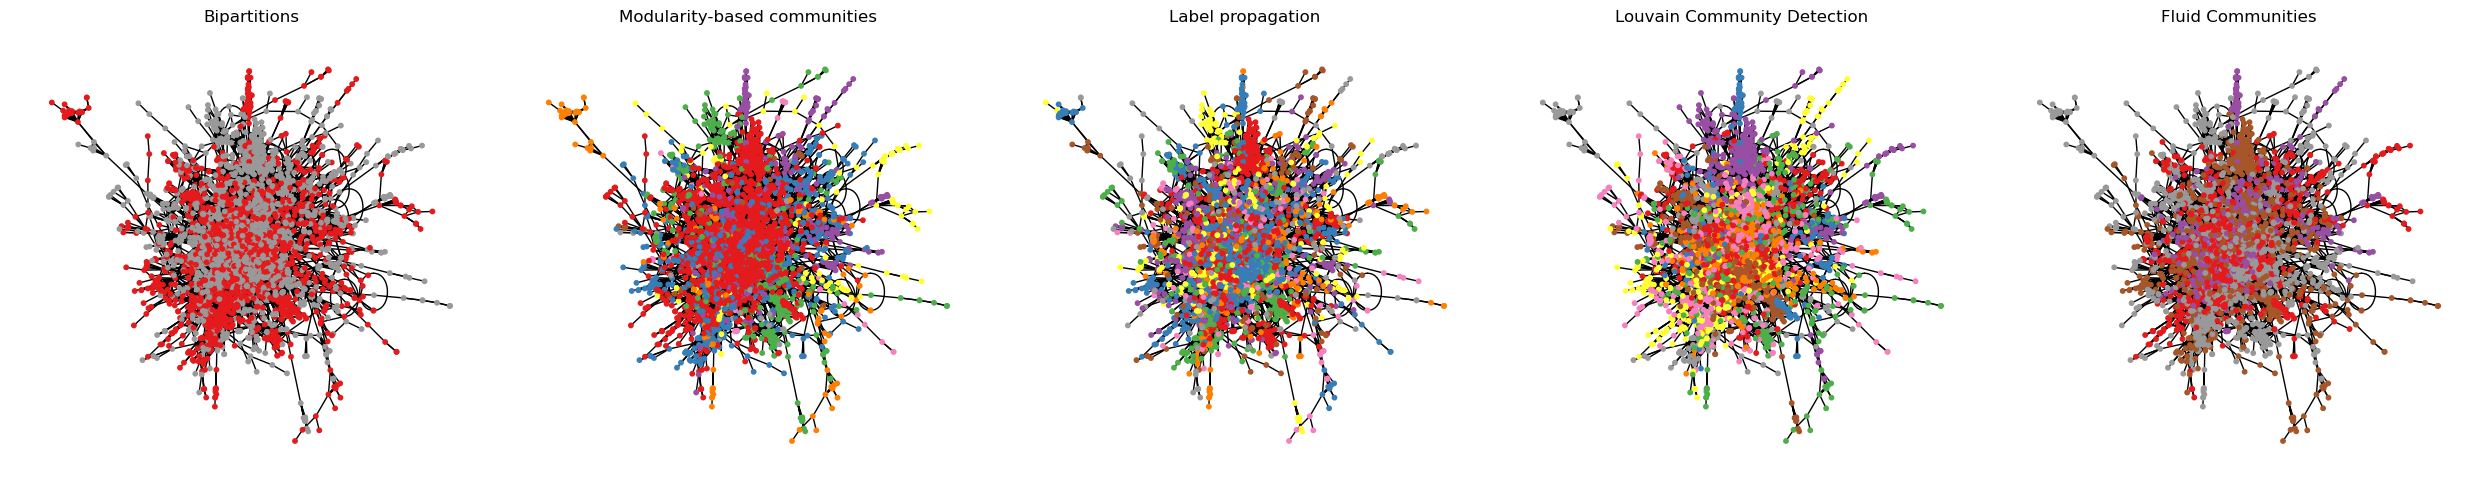

In [24]:
pos = nx.spring_layout(G_nx)
num_algorithms = len(communities)
    
fig, axes = plt.subplots(1, num_algorithms, figsize=(num_algorithms * 5, 5))

for idx, (algorithm, communities) in enumerate(communities.items()):
    ax = axes[idx] if num_algorithms > 1 else axes
    ax.set_title(algorithm)
        
    node_colors = []
    for node in G_nx.nodes:
        for community_idx, community in enumerate(communities, start=1):
            if node in community:
                node_colors.append(community_idx)
                break  # Break once the node is found in a community
        
    nx.draw(G_nx, pos, ax=ax, with_labels=False, node_size=10, node_color=node_colors, cmap=plt.cm.Set1)
    
plt.tight_layout()
plt.show()

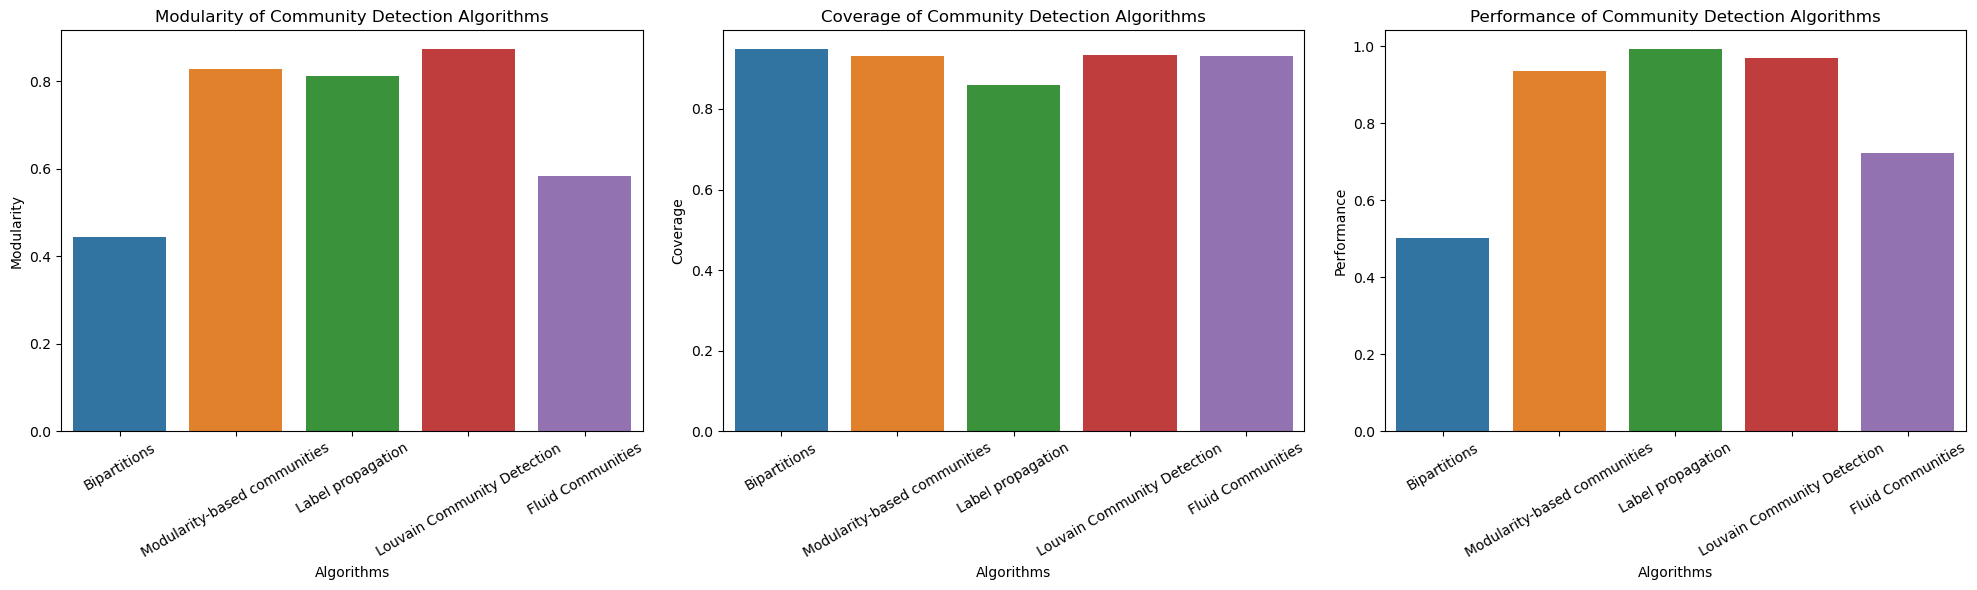

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Plotting modularity values
sns.barplot(x=list(modularity_values.keys()), y=list(modularity_values.values()), ax=axes[0])
axes[0].set_title('Modularity of Community Detection Algorithms')
axes[0].set_xlabel('Algorithms')
axes[0].set_ylabel('Modularity')
axes[0].tick_params(axis='x', rotation=30)

# Plotting coverage values
sns.barplot(x=list(coverage_values.keys()), y=list(coverage_values.values()), ax=axes[1])
axes[1].set_title('Coverage of Community Detection Algorithms')
axes[1].set_xlabel('Algorithms')
axes[1].set_ylabel('Coverage')
axes[1].tick_params(axis='x', rotation=30)

# Plotting performance values
sns.barplot(x=list(performance_values.keys()), y=list(performance_values.values()), ax=axes[2])
axes[2].set_title('Performance of Community Detection Algorithms')
axes[2].set_xlabel('Algorithms')
axes[2].set_ylabel('Performance')
axes[2].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()